# Guided Project: Visualizing Earnings Based On College Majors

In this guided project we will be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).
Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. You can find a detailed explanation of each row in the readme file.

In this project, we will try to answer and visualize the following questions:

- Do students in more popular majors make more money?
- How many majors are predominantly male? Predominantly female?
- Which category of majors have the most students?

First, let's read in the dataset and do some basic data cleaning.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
%matplotlib inline
plt.style.use('ggplot')

In [47]:
#let's read in the dataset

recent_grads = pd.read_csv('recent-grads.csv')

#First line
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [48]:
#Let's see the first five rows

recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [49]:
#And the last five rows

recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [50]:
recent_grads.describe(include='all')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,CHEMISTRY,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


In [51]:
#number of rows

row_data_count = recent_grads.shape[0]
row_data_count

173

In [52]:
#Let's drop rows containing missing values

recent_grads = recent_grads.dropna(axis=0)

In [53]:
#The number of rows after the clean up

cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

## Visualizing the data using scatterplots

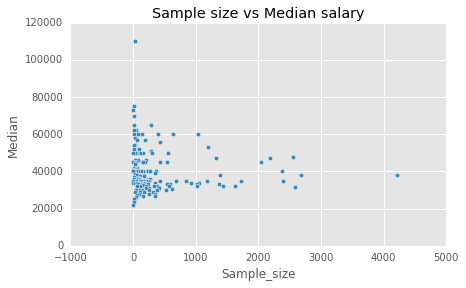

In [54]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Sample size vs Median salary')

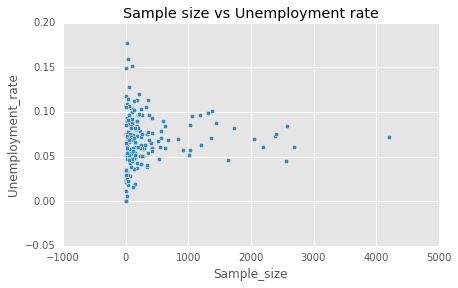

In [55]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Sample size vs Unemployment rate')

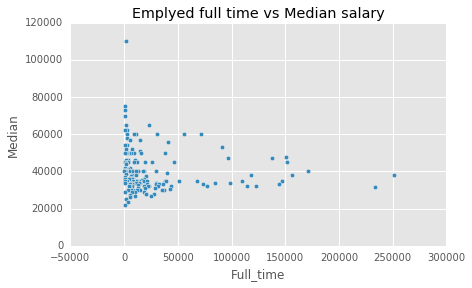

In [56]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Emplyed full time vs Median salary')

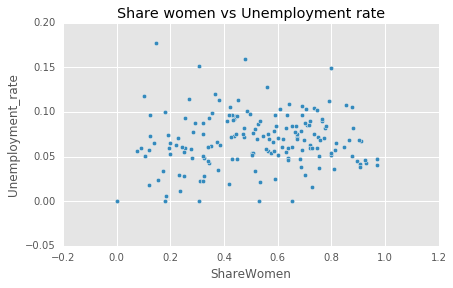

In [57]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Share women vs Unemployment rate')

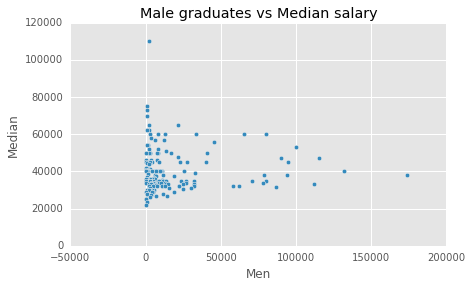

In [58]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Male graduates vs Median salary')

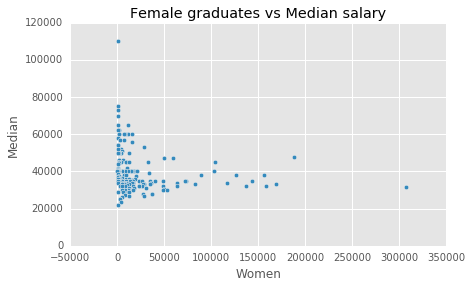

In [59]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Female graduates vs Median salary')

No direct corelation can be observed from the above scatterplots.


## Visualizing the data using histograms

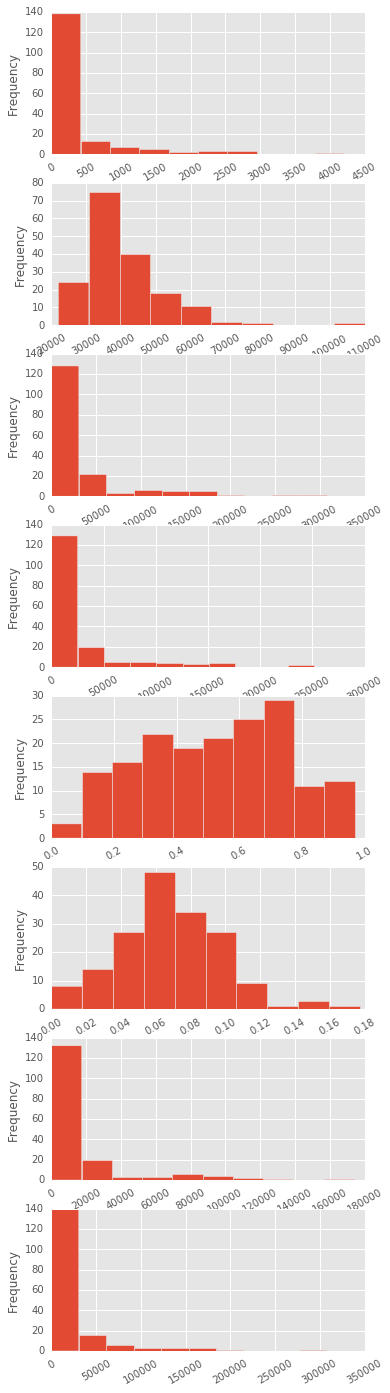

In [60]:
cols = ['Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']

fig = plt.figure(figsize=(5,24))
for r in range(0,8):
    ax=fig.add_subplot(8,1,r+1)
    ax=recent_grads[cols[r]].plot(kind='hist', rot=30)

- What percent of majors are predominantly* male? - About 44% of the majors are predominantly male. (check back up cells)
- Predominantly female? - Around 55% of the majors are predominantly female. (check back up cells)
- What's the most common median salary range? - The median salary range is 30000-40000.

______________________
*more than half of the total graduates.

## Visualizing the data using scatter matrixes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0e66cfd68>,
      dtype=object)

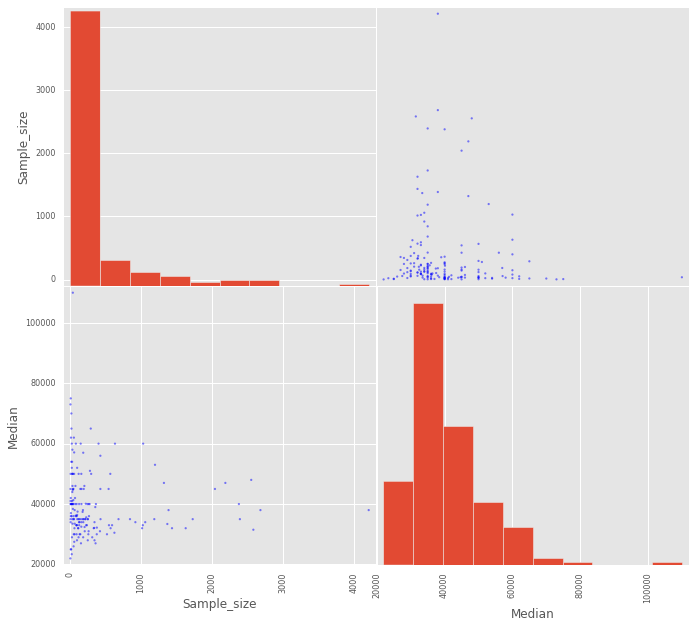

In [61]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0e8b7de80>,
      dtype=object)

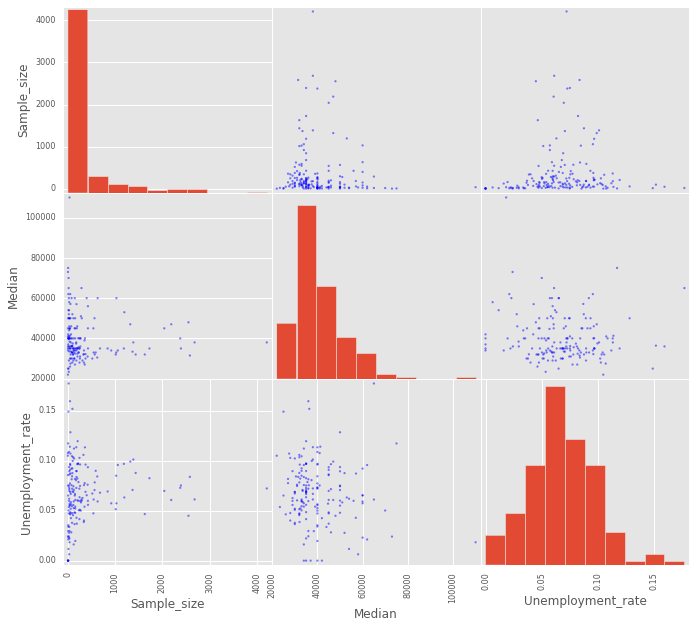

In [62]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

## Share women in the top and bottom 10 Majors

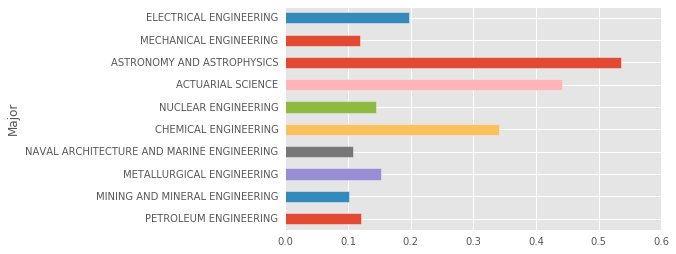

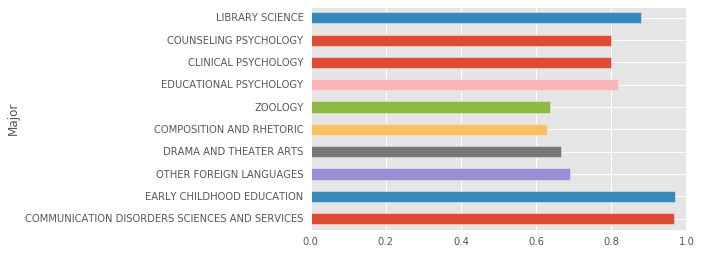

In [63]:
recent_grads.head(10).plot.barh(x='Major', y='ShareWomen', legend=False)
recent_grads.tail(10).plot.barh(x='Major', y='ShareWomen', legend=False)

Out of the top 10 majors, those with the highest share of women are:

- Astronomy and Astrophysics
- Actuarial science
- Chemical engineering

It seems that the less popular majors have a high share of female graduates.

## Unemployment rate of the top and bottom 10 majors

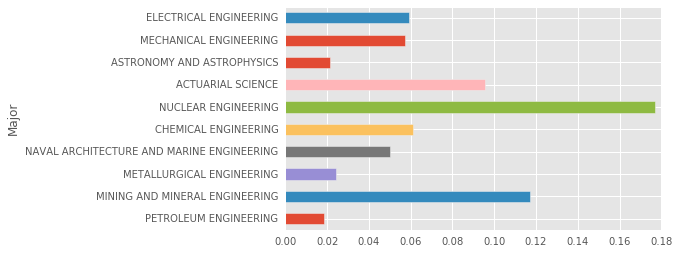

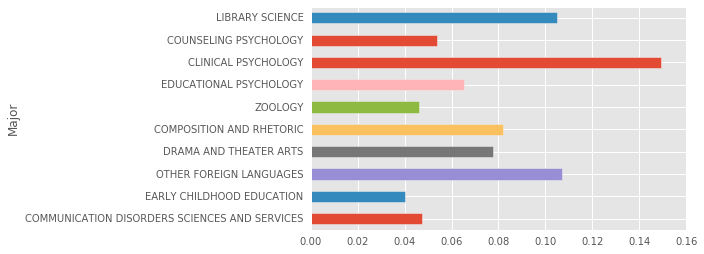

In [64]:
recent_grads.head(10).plot.barh(x='Major', y='Unemployment_rate', legend=False)
recent_grads.tail(10).plot.barh(x='Major', y='Unemployment_rate', legend=False)

10 most popular majors:

- highest unemployment rate - Nuclear Engineering
- lowest unemployment rate - Petrolium engineering

10 least popular majors:

- highest unemployment rate - Clinical psychology
- lowest unemployment rate - Early childhood education


## Number of Men vs Number of Women

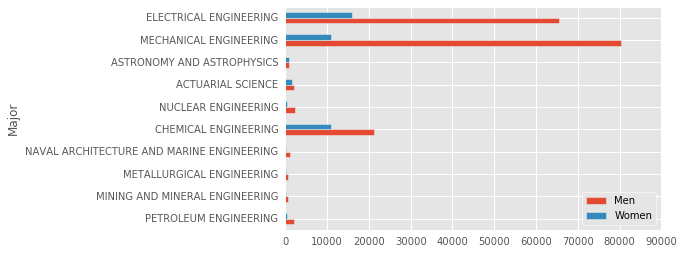

In [65]:
men_women = recent_grads[['Major', 'Men', 'Women']]
men_women.head(10).plot.barh(x='Major')

We can conclude that the most popular 10 majors are prefered by male students. We can also conclude that Engineering majors are predominantly male.

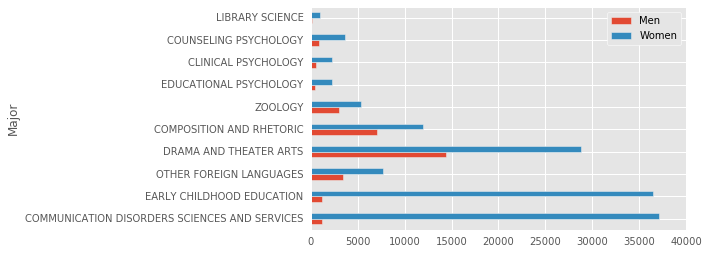

In [66]:
men_women.tail(10).plot.barh(x='Major')

We can see that the graduates of the least popular majors are predominantly female.

## Using boxplots to explore Median salaries and Unemploment rate

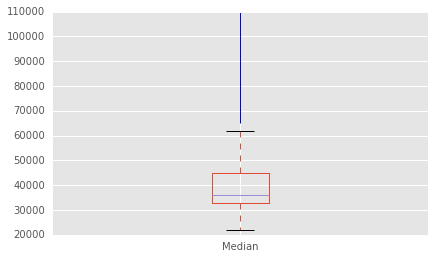

In [67]:
recent_grads['Median'].plot(kind='box')

Once again we confirm that the median salary is between 30000 and 40000.

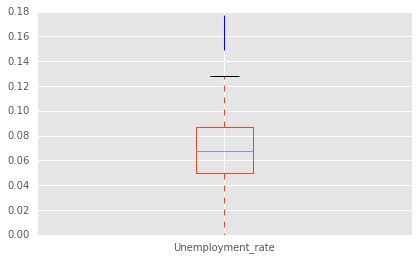

In [68]:
recent_grads['Unemployment_rate'].plot(kind='box')

The median unemployment rate is 0.06.

## Do students in more popular majors make more money?

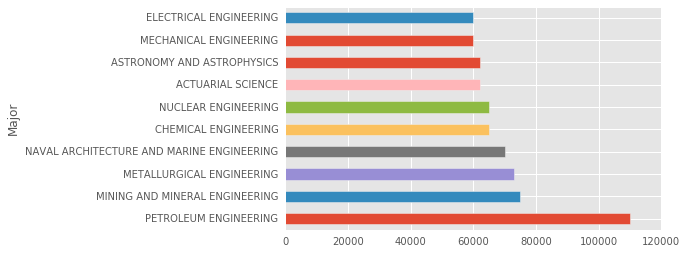

In [69]:
recent_grads.head(10).plot.barh(x='Major', y='Median', legend=False)

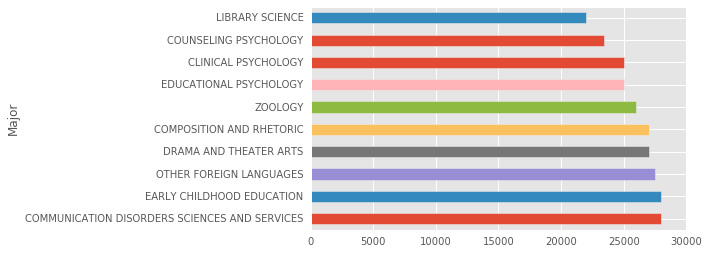

In [70]:
recent_grads.tail(10).plot.barh(x='Major', y='Median', legend=False)

Yes, we can conclude that the median salary of graduates of the top 10 ranked majors is higher than the median salary of the bottom 10 majors.

## Which category of majors have the most students?

In [71]:
students_per_cat = {}
categories = recent_grads['Major_category'].unique()

for cat in categories:
    by_cat = recent_grads[recent_grads['Major_category'] == cat]
    total = by_cat['Total'].sum()
    students_per_cat[cat] = total
    
students_per_cat

{'Agriculture & Natural Resources': 75620.0,
 'Arts': 357130.0,
 'Biology & Life Science': 453862.0,
 'Business': 1302376.0,
 'Communications & Journalism': 392601.0,
 'Computers & Mathematics': 299008.0,
 'Education': 559129.0,
 'Engineering': 537583.0,
 'Health': 463230.0,
 'Humanities & Liberal Arts': 713468.0,
 'Industrial Arts & Consumer Services': 229792.0,
 'Interdisciplinary': 12296.0,
 'Law & Public Policy': 179107.0,
 'Physical Sciences': 185479.0,
 'Psychology & Social Work': 481007.0,
 'Social Science': 529966.0}

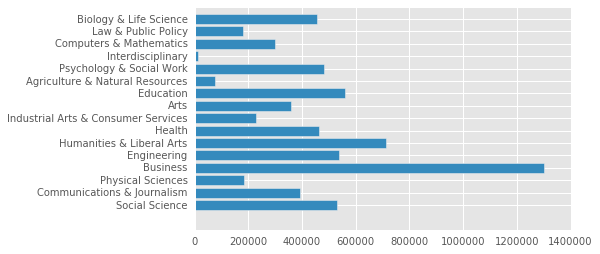

In [72]:
plt.barh(range(len(students_per_cat)), list(students_per_cat.values()), align='center')
plt.yticks(range(len(students_per_cat)), list(students_per_cat.keys()))
plt.show()

The top five Categories of majors based on total number of students are:

- Business
- Humanities & Liberal Arts
- Education
- Engineering
- Social science
- Psychology & Social Work


## Back up cells

In [73]:
#Calculating the number of Majors where over half of the total graduates are male
male = recent_grads[recent_grads['Men'] > (recent_grads['Total']/2)]
male.shape

(76, 21)

In [74]:
#Calculating the number of Majors where over half of the total graduates are female
female = recent_grads[recent_grads['Women'] > (recent_grads['Total']/2)]
female.shape

(96, 21)